# Social Media Sentiments Analysis

## Table of Contents  <a id='back'></a> 
- [Project Introduction](#project-introduction)
    - [Analysis Outline](#analysis-outline)
    - [Results](#results)
- [Importing Libraries and Opening Data Files](#importing-libraries-and-opening-data-files)
- [Pre-Processing Data](#pre-processing-data)
    - [Data Structure Overhaul](#data-structure-overhaul)
        - [Header Style](#header-style)
        - [Formatting and Data Usage](#formatting-and-data-usage)
    - [Duplicates](#duplicates)
    - [Missing Values](#missing-values)
    - [Removing Irrelevant Data](#removing-irrelevant-data)
- [Data Analysis](#data-analysis)
    - [General User Demographics](#general-user-demographics)
        - [What are the user’s preferred social media platforms?](#what-are-the-users-preferred-social-media-platforms)
        - [Which countries contain the largest population of these users?](#which-countries-contain-the-largest-population-of-these-users)
        - [Do different countries have a preferred social media platform?](#do-different-countries-have-a-preferred-social-media-platform)
    - [User Activity](#user-activity)
        - [Do users prefer to like or reshare posts?](#do-users-prefer-to-like-or-reshare-posts)
        - [Do social media users engage differently on each platform?](#do-social-media-users-engage-differently-on-each-platform)
        - [Which hours are users most active?](#which-hours-are-users-most-active)
        - [Which season do users have the highest activity on social media?](#which-season-do-users-have-the-highest-activity-on-social-media)
        - [How has user engagement changed over time?](#how-has-user-engagement-changed-over-time)
    - [User Sentiment](#user-sentiment)
        - [Is user post sentiment different on each platform?](#is-user-post-sentiment-different-on-each-platform)
        - [Does user sentiment affect the length of their text posts?](#does-user-sentiment-affect-the-length-of-their-text-posts)
        - [Does user sentiment affect likes and shareability?](#does-user-sentiment-affect-likes-and-shareability)
        - [Are there any anomalies in user sentiment throughout the day?](#are-there-any-anomalies-in-user-sentiment-throughout-the-day)
        - [How has user sentiment on each platform changed over time?](#how-has-user-sentiment-on-each-platform-changed-over-time)
- [Conclusion](#conclusion)
- [Dataset Citation](#dataset-citation)

<a name='headers'>

## Project Introduction

In this analysis, I want to gauge social media user behavior and sentiment across various platforms to better understand social media users and how they interact on the platform. The Social Media Sentiments Analysis Dataset documents user interactions with one another through their posts, likes, and reshares across multiple social media platforms. This dataset is a snapshot of user-generated content consisting of text, sentiment, timestamps, usernames, platform used, hashtags, likes, reshares, and user country. 

### Analysis Outline

Within this exploratory data analysis, we are attempting to uncover new insights and unusual anomalies within the dataset in these key areas:

1.	General User Demographics

        a. What are the user’s preferred social media platforms?

        b. Which countries contain the largest population of these users?

        c. Do different countries have a preferred social media platform?

2.	User Activity

        a. Do users prefer to like or reshare posts?

        b. Do social media users engage differently on each platform?

        c. Which hours are users most active?

        d. Which season do users have the highest activity on social media?

        e. How has user engagement changed over time?

3.	User Sentiment

        a. Is user post sentiment different on each platform?

        b. Does user sentiment affect the length of their text posts?

        c. Does user sentiment affect likes and shareability?

        d. Are there any anomalies in user sentiment throughout the day?

        e. How has user sentiment on each platform changed over time?


### Results

- Most active users are primarily from Western countries

- All platforms have roughly the same market share of users 

- Users are twice as likely to like a post than they are to reshare a post they find interesting

- Generally, annual social media activity starts strong in January and February, slows down until June and they stay at a high elevated level until winter

- Generally daily user post frequency spikes at 2 pm and has another resurgence in activity at about 7 pm

- Users are more likely to like and reshare a positive or neutral post than a negative post by about 20%

## Importing Libraries and Opening Data Files

In [1]:
# Importing the needed libraries for this assignment
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from colour import Color

In [2]:
# Importing file for assignment
try:
    sm = pd.read_csv('sentimentdataset.csv')
except:
    sm = pd.read_csv('/datasets/sentimentdataset.csv')

[Back to Table of Contents](#back)

## Pre-Processing Data

### Data Structure Overhaul

In [3]:
sm.describe()

,Unnamed: 0.1,Unnamed: 0,Retweets,Likes,Year,Month,Day,Hour
count,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000
mean,366.464481,369.740437,21.508197,42.901639,2020.471311,6.122951,15.497268,15.521858
std,211.513936,212.428936,7.061286,14.089848,2.802285,3.411763,8.474553,4.113414
min,0.000000,0.000000,5.000000,10.000000,2010.000000,1.000000,1.000000,0.000000
25%,183.750000,185.750000,17.750000,34.750000,2019.000000,3.000000,9.000000,13.000000
50%,366.500000,370.500000,22.000000,43.000000,2021.000000,6.000000,15.000000,16.000000
75%,549.250000,553.250000,25.000000,50.000000,2023.000000,9.000000,22.000000,19.000000
max,732.000000,736.000000,40.000000,80.000000,2023.000000,12.000000,31.000000,23.000000


#### Header Style

In [4]:
# Getting general information about the dataset
sm.info()
sm.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0.1  732 non-null    int64  
 1   Unnamed: 0    732 non-null    int64  
 2   Text          732 non-null    object 
 3   Sentiment     732 non-null    object 
 4   Timestamp     732 non-null    object 
 5   User          732 non-null    object 
 6   Platform      732 non-null    object 
 7   Hashtags      732 non-null    object 
 8   Retweets      732 non-null    float64
 9   Likes         732 non-null    float64
 10  Country       732 non-null    object 
 11  Year          732 non-null    int64  
 12  Month         732 non-null    int64  
 13  Day           732 non-null    int64  
 14  Hour          732 non-null    int64  
dtypes: float64(2), int64(6), object(7)
memory usage: 85.9+ KB


,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19


In [5]:
#checking for snakecase format
sm.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Text', 'Sentiment', 'Timestamp', 'User',
       'Platform', 'Hashtags', 'Retweets', 'Likes', 'Country', 'Year', 'Month',
       'Day', 'Hour'],
      dtype='object')

In [6]:
# Renaming column names to snake_case format
sm = sm.rename(columns={'Unnamed: 0.1': 'unnamed_0.01',
                        'Unnamed: 0': 'unnamed_0',
                        'Text': 'text',
                        'Sentiment': 'sentiment',
                        'Timestamp': 'timestamp',
                        'User': 'user',
                        'Platform': 'platform',
                        'Hashtags': 'hashtags',
                        'Retweets': 'reshared',
                        'Likes': 'likes',
                        'Country': 'country',
                        'Year': 'year',
                        'Month': 'month',
                        'Day': 'day',
                        'Hour': 'hour'})
sm.columns

Index(['unnamed_0.01', 'unnamed_0', 'text', 'sentiment', 'timestamp', 'user',
       'platform', 'hashtags', 'reshared', 'likes', 'country', 'year', 'month',
       'day', 'hour'],
      dtype='object')

[Back to Table of Contents](#back)

#### Formatting and Data Usage

In [7]:
sm.info()
sm.sample()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   unnamed_0.01  732 non-null    int64  
 1   unnamed_0     732 non-null    int64  
 2   text          732 non-null    object 
 3   sentiment     732 non-null    object 
 4   timestamp     732 non-null    object 
 5   user          732 non-null    object 
 6   platform      732 non-null    object 
 7   hashtags      732 non-null    object 
 8   reshared      732 non-null    float64
 9   likes         732 non-null    float64
 10  country       732 non-null    object 
 11  year          732 non-null    int64  
 12  month         732 non-null    int64  
 13  day           732 non-null    int64  
 14  hour          732 non-null    int64  
dtypes: float64(2), int64(6), object(7)
memory usage: 85.9+ KB


,unnamed_0.01,unnamed_0,text,sentiment,timestamp,user,platform,hashtags,reshared,likes,country,year,month,day,hour
599,600,604,Embarked on a DIY home decor project. Let's ho...,Excitement,2023-06-08 16:00:00,HomeDecorator,Instagram,#DIYGoals #TeenCreative,35.0,70.0,UK,2023,6,8,16


In [8]:
# Checking the text column
sm['text'].head()

0     Enjoying a beautiful day at the park!        ...
1     Traffic was terrible this morning.           ...
2     Just finished an amazing workout! 💪          ...
3     Excited about the upcoming weekend getaway!  ...
4     Trying out a new recipe for dinner tonight.  ...
Name: text, dtype: object

In [9]:
# To make the text column more usable we can change the column into a count of the number of
# characters in each text. Since we have the sentiment column, we can get an idea of what type 
# of emotion was expressed in the text and the character length will show the intensity of that feeling
sm['text'] = sm['text'].str.lower()
sm['text'] = sm['text'].apply(lambda x: x.rstrip()).apply(lambda x: x.lstrip())
sm['text'] = sm['text'].apply(lambda x: x.replace(' ', '_'))
sm['text_len'] = sm['text'].str.len()

In [10]:
# Checking the sentiment column
sm['sentiment'].head()

0     Positive  
1     Negative  
2     Positive  
3     Positive  
4     Neutral   
Name: sentiment, dtype: object

In [11]:
# Lowering the elements to snakecase format, removing irregular spaces, and changing the data type to lower data usage
sm['sentiment'] = sm['sentiment'].str.lower()
sm['sentiment'] = sm['sentiment'].apply(lambda x: x.rstrip()).apply(lambda x: x.lstrip())
sm['sentiment'] = sm['sentiment'].apply(lambda x: x.replace(' ', '_'))
sm['sentiment'] = sm['sentiment'].astype('category')
sm['sentiment'].head()

0    positive
1    negative
2    positive
3    positive
4     neutral
Name: sentiment, dtype: category
Categories (191, object): ['acceptance', 'accomplishment', 'admiration', 'adoration', ..., 'wonder', 'wonderment', 'yearning', 'zest']

In [12]:
# Looking at the first few values it shows the time stamp column is a string type but
# we should convert it to a datetime type to save data usage
sm['timestamp'] = pd.to_datetime(sm['timestamp'], format='%Y-%m-%d %H:%M:%S')
sm['timestamp'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 732 entries, 0 to 731
Series name: timestamp
Non-Null Count  Dtype         
--------------  -----         
732 non-null    datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 5.8 KB


In [13]:
# Checking the user column
sm['user'].head()

0     User123      
1     CommuterX    
2     FitnessFan   
3     AdventureX   
4     ChefCook     
Name: user, dtype: object

In [14]:
# Lowering the user column to snakecase format and removing spaces that are not needed
sm['user'] = sm['user'].str.lower()
sm['user'] = sm['user'].apply(lambda x: x.rstrip()).apply(lambda x: x.lstrip())
sm['user'].head()

0       user123
1     commuterx
2    fitnessfan
3    adventurex
4      chefcook
Name: user, dtype: object

In [15]:
# Checking the platform column
sm['platform'].head()

0      Twitter  
1      Twitter  
2     Instagram 
3      Facebook 
4     Instagram 
Name: platform, dtype: object

In [16]:
# Lowering the platform column to snakecase format and fixing spacing typos
sm['platform'] = sm['platform'].str.lower()
sm['platform'] = sm['platform'].apply(lambda x: x.strip())
sm['platform'] = sm['platform'].astype('category')
sm['platform'].head()

0      twitter
1      twitter
2    instagram
3     facebook
4    instagram
Name: platform, dtype: category
Categories (3, object): ['facebook', 'instagram', 'twitter']

In [17]:
# Checking the hashtags column
sm['hashtags'].head()

0     #Nature #Park                            
1     #Traffic #Morning                        
2     #Fitness #Workout                        
3     #Travel #Adventure                       
4     #Cooking #Food                           
Name: hashtags, dtype: object

In [18]:
# Lowering the hashtags column to snakecase format and removing spaces that are not needed
sm['hashtags'] = sm['hashtags'].str.lower()
sm['hashtags'] = sm['hashtags'].apply(lambda x: x.rstrip()).apply(lambda x: x.lstrip())
sm['hashtags'] = sm['hashtags'].apply(lambda x: x.replace(' ', '_'))
sm['hashtags'].head()

0         #nature_#park
1     #traffic_#morning
2     #fitness_#workout
3    #travel_#adventure
4        #cooking_#food
Name: hashtags, dtype: object

In [19]:
# Checking the country column
sm['country'].head()

0       USA      
1       Canada   
2     USA        
3       UK       
4      Australia 
Name: country, dtype: object

In [20]:
# Lowering the country column to snakecase format and removing spaces
sm['country'] = sm['country'].str.lower()
sm['country'] = sm['country'].apply(lambda x: x.rstrip()).apply(lambda x: x.lstrip())
sm['country'] = sm['country'].apply(lambda x: x.replace(' ', '_'))
sm['country'] = sm['country'].astype('category')
sm['country'].head()

0          usa
1       canada
2          usa
3           uk
4    australia
Name: country, dtype: category
Categories (33, object): ['australia', 'austria', 'belgium', 'brazil', ..., 'switzerland', 'thailand', 'uk', 'usa']

[Back to Table of Contents](#back)

### Duplicates

In [21]:
# Checking for duplicates
sm.duplicated().sum()

0

In [22]:
# Looking at the sentiment column there are a lot of unique values that tell a similar story
sm['sentiment'].value_counts()

positive        45
joy             44
excitement      37
contentment     19
gratitude       18
                ..
energy           1
engagement       1
heartache        1
breakthrough     1
playfuljoy       1
Name: sentiment, Length: 191, dtype: int64

In [23]:
# For this analysis, we are going to reduce the number of values in the sentiment column to positive, neutral, 
# and negative to make it easier to read and filter since many of these values are expressing a form of both feelings.
sm['sentiment'] = sm['sentiment'].replace(['joy',
                                           'excitement',
                                           'contentment',
                                           'gratitude',
                                           'curiosity',
                                           'serenity',
                                           'happy',
                                           'nostalgia',
                                           'awe',
                                           'hopeful',
                                           'euphoria',
                                           'enthusiasm',
                                           'pride',
                                           'elation',
                                           'determination',
                                           'inspiration',
                                           'playful',
                                           'surprise',
                                           'happiness',
                                           'inspired',
                                           'hope',
                                           'empowerment',
                                           'admiration',
                                           'compassionate',
                                           'compassion',
                                           'proud',
                                           'calmness',
                                           'reverence',
                                           'fulfillment',
                                           'tenderness',
                                           'arousal',
                                           'enchantment',
                                           'grateful',
                                           'thrill',
                                           'confident',
                                           'kind',
                                           'creativity',
                                           'accomplishment',
                                           'harmony',
                                           'free-spirited',
                                           'empathetic',
                                           'satisfaction',
                                           'amusement',
                                           'adventure',
                                           'love',
                                           'enjoyment',
                                           'exploration',
                                           'adoration',
                                           'zest',
                                           'affection',
                                           'radiance',
                                           'rejuvenation',
                                           'resilience',
                                           'coziness',
                                           'whimsy',
                                           'captivation',
                                           'tranquility',
                                           'positivity',
                                           'playfuljoy',
                                           'overjoyed',
                                           'optimism',
                                           'ocean\'s_freedom',
                                           'nature\'s_beauty',
                                           'relief',
                                           'motivation',
                                           'amazement',
                                           'mindfulness',
                                           'mesmerizing',
                                           'melodic',
                                           'marvel',
                                           'kindness',
                                           'joyfulreunion',
                                           'joy_in_baking',
                                           'intrigue',
                                           'appreciation',
                                           'grandeur',
                                           'artisticburst',
                                           'iconic',
                                           'imagination',
                                           'renewed_effort',
                                           'runway_creativity',
                                           'freedom',
                                           'friendship',
                                           'heartwarming',
                                           'success',
                                           'blessed',
                                           'engagement',
                                           'festivejoy',
                                           'thrilling_journey',
                                           'touched',
                                           'triumph',
                                           'vibrancy',
                                           'winter_magic',
                                           'breakthrough',
                                           'celebration ',
                                           'energy',
                                           'elegance',
                                           'ecstasy',
                                           'dreamchaser',
                                           'dazzle',
                                           'culinaryodyssey',
                                           'culinary_adventure',
                                           'creative_inspiration',
                                           'confidence',
                                           'colorful',
                                           'charm',
                                           'celebration',
                                           'celestial_wonder',
                                           'wonderment'
                                           ], 'positive')

sm['sentiment'] = sm['sentiment'].replace(['acceptance',
                                           'indifference',
                                           'ambivalence',
                                           'reflection',
                                           'anticipation',
                                           'wonder',
                                           'emotion',
                                           'contemplation',
                                           'intimidation',
                                           'adrenaline',
                                           'journey',
                                           'innerjourney',
                                           'hypnotic',
                                           'immersion',
                                           'romance',
                                           'bittersweet',
                                           'solitude',
                                           'spark',
                                           'suspense',
                                           'envisioning_history',
                                           'sympathy',
                                           'emotionalstorm',
                                           'whispers_of_the_past',
                                           'darkness',
                                           'connection',
                                           'challenge',
                                           'obstacle',
                                           ], 'neutral')

sm['sentiment'] = sm['sentiment'].replace(['despair',
                                           'sad',
                                           'grief',
                                           'loneliness',
                                           'embarrassed',
                                           'confusion',
                                           'melancholy',
                                           'numbness',
                                           'frustration',
                                           'regret',
                                           'hate',
                                           'bad',
                                           'disgust',
                                           'betrayal',
                                           'bitterness',
                                           'frustrated',
                                           'desolation',
                                           'boredom',
                                           'overwhelmed',
                                           'jealousy',
                                           'jealous',
                                           'heartbreak',
                                           'dismissive',
                                           'fearful',
                                           'envious',
                                           'resentment',
                                           'bitter',
                                           'shame',
                                           'devastated',
                                           'envy',
                                           'loss',
                                           'fear',
                                           'helplessness',
                                           'isolation',
                                           'mischievous',
                                           'disappointed',
                                           'sadness',
                                           'sorrow',
                                           'disappointment',
                                           'anxiety',
                                           'apprehensive',
                                           'yearning',
                                           'anger',
                                           'pensive',
                                           'miscalculation',
                                           'lostlove',
                                           'pressure',
                                           'solace',
                                           'ruins',
                                           'exhaustion',
                                           'heartache',
                                           'suffering',
                                           'desperation'
                                           ], 'negative')

sm['sentiment'].value_counts()

positive    466
negative    194
neutral      72
Name: sentiment, dtype: int64

[Back to Table of Contents](#back)

### Missing Values

In [24]:
# Checking for null values
sm.isna().sum()

unnamed_0.01    0
unnamed_0       0
text            0
sentiment       0
timestamp       0
user            0
platform        0
hashtags        0
reshared        0
likes           0
country         0
year            0
month           0
day             0
hour            0
text_len        0
dtype: int64

[Back to Table of Contents](#back)

### Removing Irrelevant Data

In [25]:
# Looking at both of the numeric unnamed columns, it appears to look like a column 
# that was accidentally recording the row value. If they are we can remove these columns.
sm['unnamed_0'].isin(sm['unnamed_0.01']).count()

732

In [26]:
# After uncovering that these two columns are identical to the row value, 
# they can be removed to optimize data usage
sm = sm.drop(columns=['unnamed_0.01', 'unnamed_0', 'text', 'day', 'hashtags'])
sm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   sentiment  732 non-null    category      
 1   timestamp  732 non-null    datetime64[ns]
 2   user       732 non-null    object        
 3   platform   732 non-null    category      
 4   reshared   732 non-null    float64       
 5   likes      732 non-null    float64       
 6   country    732 non-null    category      
 7   year       732 non-null    int64         
 8   month      732 non-null    int64         
 9   hour       732 non-null    int64         
 10  text_len   732 non-null    int64         
dtypes: category(3), datetime64[ns](1), float64(2), int64(4), object(1)
memory usage: 49.6+ KB


[Back to Table of Contents](#back)

## Data Analysis

### General User Demographics

#### What are the user’s preferred social media platforms?

In [27]:
# Sorting out the number of unique users
sorted = sm.sort_values(['user'], ascending=True)
unique_users = sorted.groupby('user').first().reset_index()

print(unique_users['user'].nunique())
print(sm['user'].nunique())

670
670


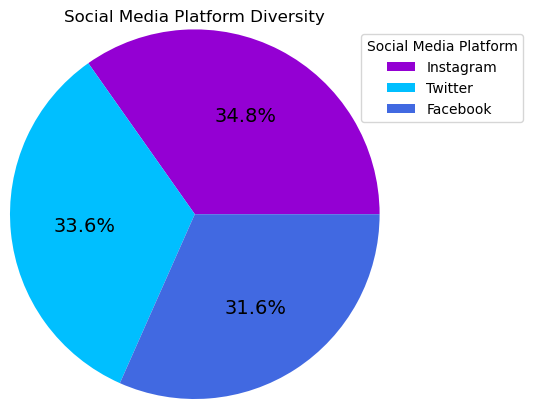

In [28]:
unique_users['platform'].value_counts().plot(kind='pie',
                                             autopct='%1.1f%%',
                                             fontsize=14,
                                             labels=['', '', ''],
                                             colors=['darkviolet', 'deepskyblue', 'royalblue'],
                                             radius=1.25)

plt.title('Social Media Platform Diversity')
plt. ylabel('') 

plt.legend(['Instagram', 'Twitter', 'Facebook'],
           title='Social Media Platform',
           loc=[0.95,.75])
plt.show()
# According to the data, it shows that users prefer to use Instagram over Twitter and Facebook by a minor margin, however, all three social media platforms have a similar amount of users

[Back to Table of Contents](#back)

#### Which countries contain the largest population of these users?

In [29]:
# Finding the distribution of social media users across all participating countries
sm.groupby(['country']).agg({'user': 'nunique'}).sort_values(by='user', ascending=False)

# Looking at the distribution of users across all countries, we have uncovered that the total number of users 
# is heavily skewed toward the top 10 countries. Most of these countries are first-world countries alongside a 
# few developing countries that have increased access to the internet. 

,user
country,
usa,179
uk,139
canada,129
australia,69
india,67
brazil,16
france,16
japan,15
germany,14


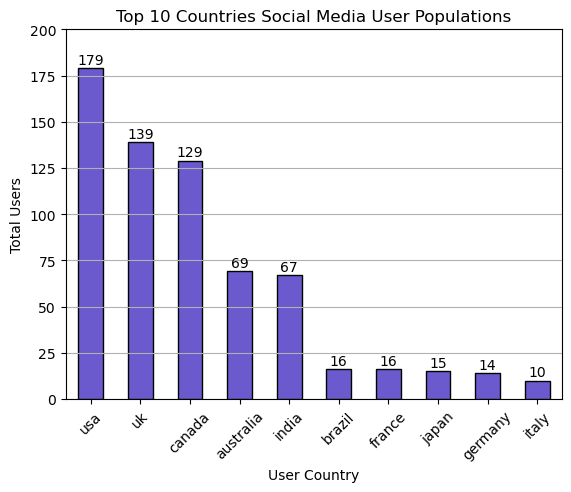

In [30]:
top_10_size = sm.groupby(['country']).agg({'user': 'nunique'}).sort_values(by='user', ascending=False).head(10).plot(kind='bar',
                                                                                                                     color='slateblue',
                                                                                                                     edgecolor='black')

for rect in top_10_size.patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    space = 1
    label = '{:.0f}'.format(y_value)
    top_10_size.annotate(label, (x_value, y_value), xytext=(0, space), textcoords='offset points', ha='center', va='bottom')

top_10_size.get_legend().remove()

plt.title('Top 10 Countries Social Media User Populations')
plt.xlabel('User Country')
plt.xticks(rotation=45)
plt.ylabel('Total Users')
plt.ylim([0, 200])

plt.grid(axis='y')
plt.show()

# Even within the top 20 largest social media markets, user distribution is heavily concentrated within the top 5 countries

[Back to Table of Contents](#back)

#### Do different countries have a preferred social media platform?

In [31]:
# Created a function to find the number of users from each country and platform to eventually make a stacked bar graph to show user platforms within each country
def user_count(country):
    return sm[(sm['country'] == country)].groupby(['country', 'platform']).agg({'user': 'nunique'}).sort_values(by='user', ascending=False).head(3).apply(list).reset_index()

usa_count = user_count('usa')
uk_count = user_count('uk')
canada_count = user_count('canada')
australia_count = user_count('australia')
india_count = user_count('india')
brazil_count = user_count('brazil')
france_count = user_count('france')
japan_count = user_count('japan')
germany_count = user_count('germany')
italy_count = user_count('italy')

# Using concat to create a new dataframe with the total number of users that use each platform from the top 10 countries with the largest user base
country_user_count = pd.concat([usa_count, uk_count, canada_count, australia_count, india_count, brazil_count, france_count, japan_count, germany_count, italy_count], ignore_index = True)

In [32]:
# Creating a new function to retrieve only the numeric value of the total users from the given country and platform
def platform_count(country, platform):
    return country_user_count[(country_user_count['country'] == country) & (country_user_count['platform'] == platform)].select_dtypes(int).values

# Creating a new dataframe to make a stacked bar graph of total users and their prefered plaform
top_10_countries = pd.DataFrame([
    ['usa', platform_count('usa', 'twitter'), platform_count('usa', 'instagram'), platform_count('usa', 'facebook')],
    ['uk', platform_count('uk', 'twitter'), platform_count('uk', 'instagram'), platform_count('uk', 'facebook')],
    ['canada', platform_count('canada', 'twitter'), platform_count('canada', 'instagram'), platform_count('canada', 'facebook')],
    ['australia', platform_count('australia', 'twitter'), platform_count('australia', 'instagram'), platform_count('australia', 'facebook')],
    ['india', platform_count('india', 'twitter'), platform_count('india', 'instagram'), platform_count('india', 'facebook')],
    ['brazil',platform_count('brazil', 'twitter'), platform_count('brazil', 'instagram'), platform_count('brazil', 'facebook')],
    ['france', platform_count('france', 'twitter'), platform_count('france', 'instagram'), platform_count('france', 'facebook')],
    ['japan', platform_count('japan', 'twitter'), platform_count('japan', 'instagram'), platform_count('japan', 'facebook')],
    ['germany', platform_count('germany', 'twitter'), platform_count('germany', 'instagram'), platform_count('germany', 'facebook')],
    ['italy', platform_count('italy', 'twitter'), platform_count('italy', 'instagram'), platform_count('italy', 'facebook')]],
    columns=['country', 'twitter', 'instagram', 'facebook'])

print(top_10_countries)
top_10_countries.info()

     country twitter instagram facebook
0        usa  [[54]]    [[68]]   [[58]]
1         uk  [[47]]    [[51]]   [[41]]
2     canada  [[46]]    [[42]]   [[43]]
3  australia  [[21]]    [[26]]   [[23]]
4      india  [[29]]    [[19]]   [[20]]
5     brazil   [[5]]     [[5]]    [[6]]
6     france   [[9]]     [[5]]    [[2]]
7      japan   [[4]]     [[5]]    [[6]]
8    germany   [[4]]     [[3]]    [[7]]
9      italy   [[4]]     [[2]]    [[4]]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   country    10 non-null     object
 1   twitter    10 non-null     object
 2   instagram  10 non-null     object
 3   facebook   10 non-null     object
dtypes: object(4)
memory usage: 448.0+ bytes


In [33]:
# Converting data values to the right data type
top_10_countries['twitter'] = top_10_countries['twitter'].astype('int')
top_10_countries['instagram'] = top_10_countries['instagram'].astype('int')
top_10_countries['facebook'] = top_10_countries['facebook'].astype('int')

top_10_countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   country    10 non-null     object
 1   twitter    10 non-null     int32 
 2   instagram  10 non-null     int32 
 3   facebook   10 non-null     int32 
dtypes: int32(3), object(1)
memory usage: 328.0+ bytes


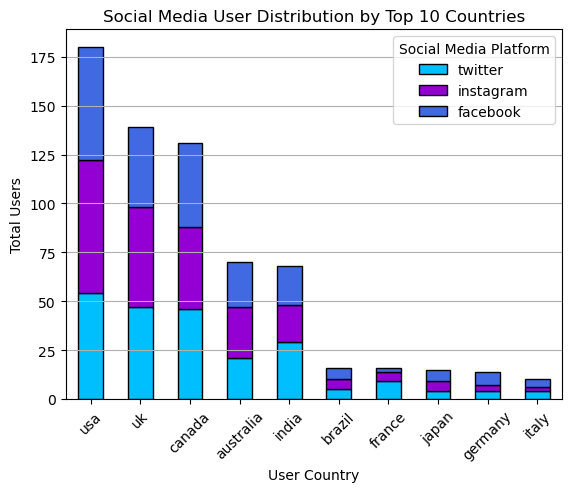

In [34]:
# Creating a stacked bar chart to show the platform diversity between the top 10 largest social media markets
top_10_countries.plot(x='country',
                      kind='bar',
                      stacked=True,
                      color=['deepskyblue', 'darkviolet', 'royalblue'],
                      edgecolor='black')

plt.title('Social Media User Distribution by Top 10 Countries')
plt.xlabel('User Country')
plt.xticks(rotation=45)
plt.ylabel('Total Users')

plt.legend(title='Social Media Platform')
plt.grid(axis='y')
plt.show()

# Within the top 10 social media markets, only India and France have a minor preference for Twitter,
# Australia and Japan for Instagram, and Germany for Facebook. Still, most users are equally split across all three social media platforms

[Back to Table of Contents](#back)

### User Activity

#### Do users prefer to like or reshare posts?

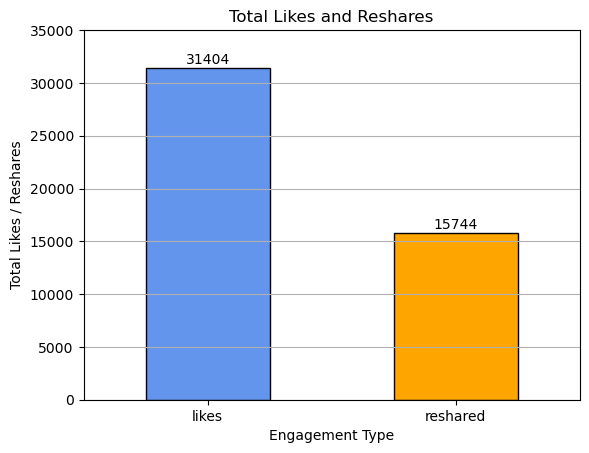

In [35]:
# Creating a bar plot with total likes and reshares
sum_engagement = sm.agg({'likes': 'sum',
                         'reshared': 'sum'}).plot(kind='bar',
                                                  color=['cornflowerblue', 'orange'],
                                                  edgecolor='black')

for rect in sum_engagement.patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    space = 1
    label = '{:.0f}'.format(y_value)
    sum_engagement.annotate(label, (x_value, y_value), xytext=(0, space), textcoords='offset points', ha='center', va='bottom')

plt.title('Total Likes and Reshares')
plt.xlabel('Engagement Type')
plt.xticks(rotation=360)
plt.ylabel('Total Likes / Reshares')
plt.ylim([0, 35000])

plt.grid(axis='y')
plt.show()

# Overall, posts tend to be liked more than shared by most social media users. Generally,
# for every two likes on a post, one person reshares the post indicating that reshares are more scarce than likes.

[Back to Table of Contents](#back)

#### Do social media users engage differently on each platform?

In [36]:
# Creating a new dataframe with total users, likes, and reshares to later calculate the average like and reshare per post
user_totals = sm.groupby('platform').agg({'user': 'count',
                                          'likes': 'sum',
                                          'reshared': 'sum'})

# Dividing the total number of likes and reshares by the total number of unique users to find the average number of likes and reshares per post
user_totals['avg_likes'] = (user_totals['likes'] / user_totals['user']).round(1)
user_totals['avg_reshares'] = (user_totals['reshared'] / user_totals['user']).round(1)

# Removing the total number of users, likes, and reshares to keep only the calculated averages
user_totals.drop(columns=['user', 'likes', 'reshared'], inplace=True)
user_totals

,avg_likes,avg_reshares
platform,,
facebook,41.9,21.0
instagram,45.1,22.6
twitter,41.6,20.9


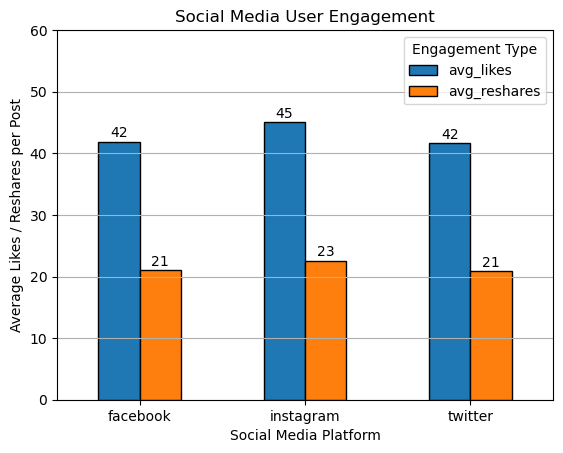

In [37]:
utp = user_totals.plot(kind='bar',
                       edgecolor='black')

for rect in utp.patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    space = 1
    label = '{:.0f}'.format(y_value)
    utp.annotate(label, (x_value, y_value), xytext=(0, space), textcoords='offset points', ha='center', va='bottom')

plt.title('Social Media User Engagement')
plt.xlabel('Social Media Platform')
plt.xticks(rotation=360)
plt.ylabel('Average Likes / Reshares per Post')
plt.ylim([0, 60])

plt.legend(title='Engagement Type')
plt.grid(axis='y')
plt.show()

# Based on the average number of likes and reshares per post, users are more inclined to like posts twice as 
# likely as they are to reshare the post. This could also signal that reshares are more valuable than likes due 
# to their scarcity compared to likes. If a post has an above-average number of reshares within a short period, 
# then it could be a strong indicator to be recommended on the public or trending page.

[Back to Table of Contents](#back)

#### Which hours are users most active?

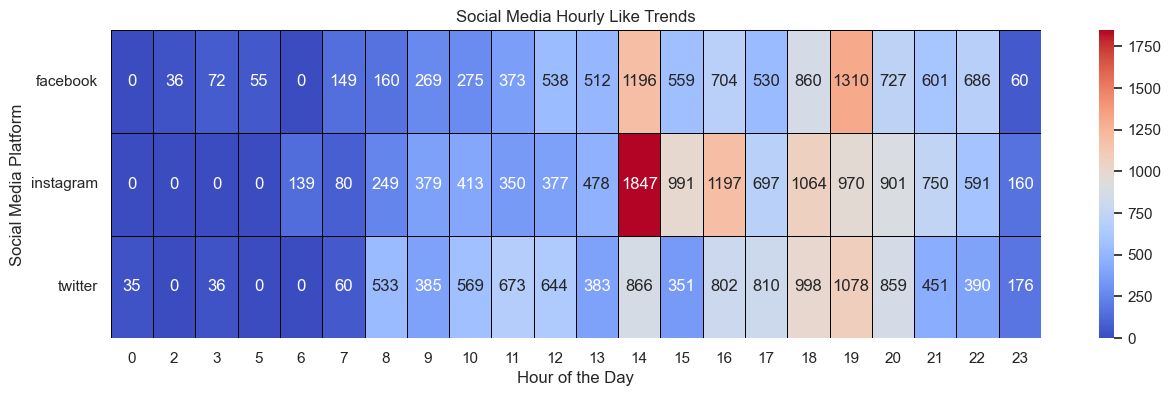

In [38]:
# Creating and plotting a pivot table to count the total hourly likes for every hour in a day
likes_pivot_hourly = sm.pivot_table(index='platform',
                                    columns='hour',
                                    values='likes',
                                    aggfunc='sum')

sns.set(style='white')
plt.figure(figsize=(15, 4))
sns.heatmap(likes_pivot_hourly,
            cmap='coolwarm',
            annot=True,
            fmt='g',
            linewidths=.5,
            linecolor='black')

plt.title('Social Media Hourly Like Trends')
plt.xlabel('Hour of the Day')
plt.ylabel('Social Media Platform')
plt.yticks(rotation=360)
plt.show()

# Based on the pivot table, users across all platforms generally start liking posts around 8 am and peak at 2 pm.
# After peaking at 2 pm it slowly loses momentum and dies around midnight. However, it should be noted that when 
# analyzing individual platforms Facebook has a second peak in likes around 7 pm and Twitter’s actual peak is also 
# at 7 pm. This could correlate with school hours since most active social media users tend to be younger and 2 pm 
# is usually when school hours end and 7 pm is usually when sports practice ends. 

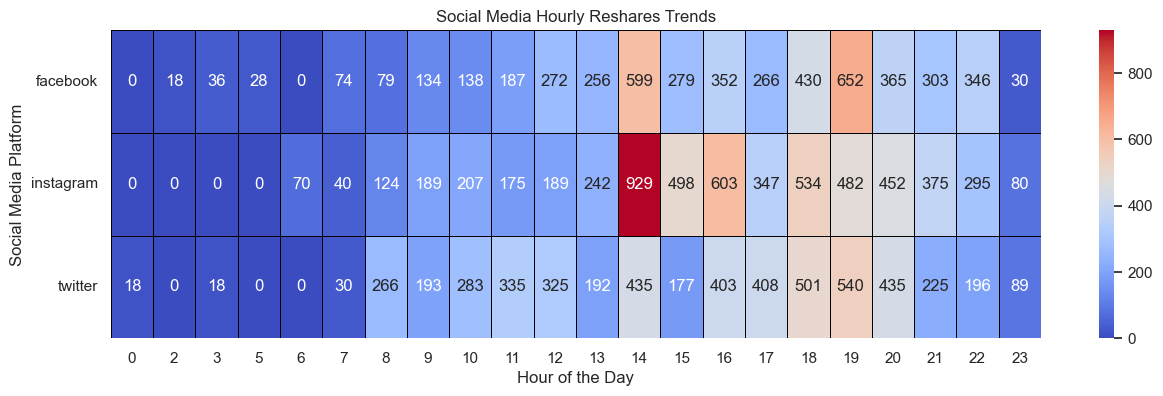

In [39]:
# Creating and plotting a pivot table to count the total hourly reshares for every hour in a day
reshares_pivot_hourly = sm.pivot_table(index='platform',
                                       columns='hour',
                                       values='reshared',
                                       aggfunc='sum')

sns.set(style='white')
plt.figure(figsize=(15, 4))
sns.heatmap(reshares_pivot_hourly,
            cmap='coolwarm',
            annot=True,
            fmt='g',
            linewidths=.5,
            linecolor='black')

plt.title('Social Media Hourly Reshares Trends')
plt.xlabel('Hour of the Day')
plt.ylabel('Social Media Platform')
plt.yticks(rotation=360)
plt.show()

# From a trend perspective, the reshares engagement trend follows the same trend as the likes engagement trend on all platforms

[Back to Table of Contents](#back)

#### Which season do users have the highest activity on social media?

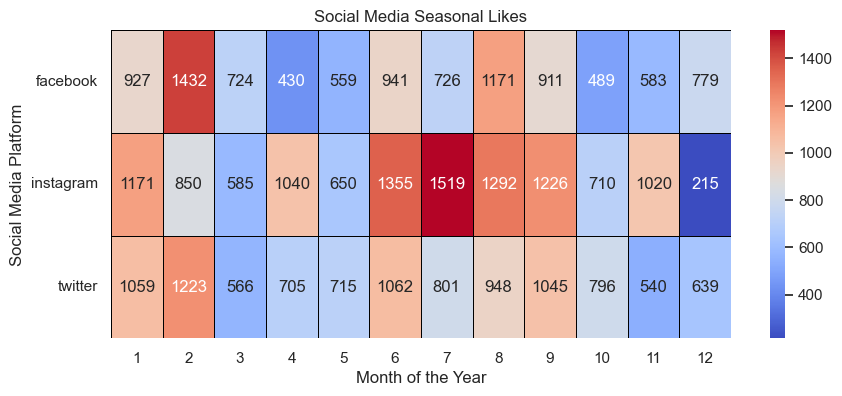

In [40]:
# Creating and plotting a pivot table to count the total monthly likes for every month in a year
likes_pivot_monthly = sm.pivot_table(index='platform',
                                     columns='month',
                                     values='likes',
                                     aggfunc='sum')

sns.set(style='white')
plt.figure(figsize=(10, 4))
sns.heatmap(likes_pivot_monthly,
            cmap='coolwarm',
            annot=True,
            fmt='g',
            linewidths=.5,
            linecolor='black')

plt.title('Social Media Seasonal Likes')
plt.xlabel('Month of the Year')
plt.ylabel('Social Media Platform')
plt.yticks(rotation=360)
plt.show()

# Seasonally across all platforms, total user likes start strong in January and February and cool down in 
# spring before peaking in the summer. It is interesting to note that on Instagram February is one of the 
# slower months for total likes and July has its highest total likes. In contrast, Facebook and Twitter 
# have one of their slowest total likes months in July and the highest in February.

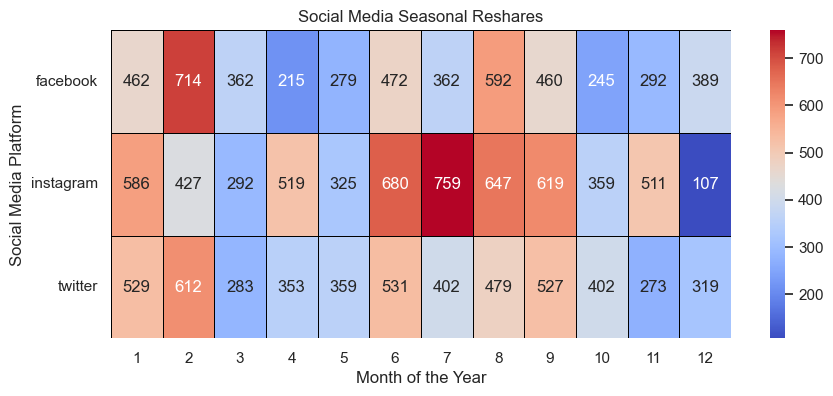

In [41]:
# Creating and plotting a pivot table to count the total monthly reshares for every month in a year
reshared_pivot_monthly = sm.pivot_table(index='platform',
                                        columns='month',
                                        values='reshared',
                                        aggfunc='sum')

sns.set(style='white')
plt.figure(figsize=(10, 4))
sns.heatmap(reshared_pivot_monthly,
            cmap='coolwarm',
            annot=True,
            fmt='g',
            linewidths=.5,
            linecolor='black')

plt.title('Social Media Seasonal Reshares')
plt.xlabel('Month of the Year')
plt.ylabel('Social Media Platform')
plt.yticks(rotation=360)
plt.show()

# For the total monthly reshares, it essentially mimics the likes seasonal trends with all three platforms.
# Facebook and Twitter had their peak total reshares in February and Instagram had their peak total reshares in July.

[Back to Table of Contents](#back)

#### How has user engagement changed over time?

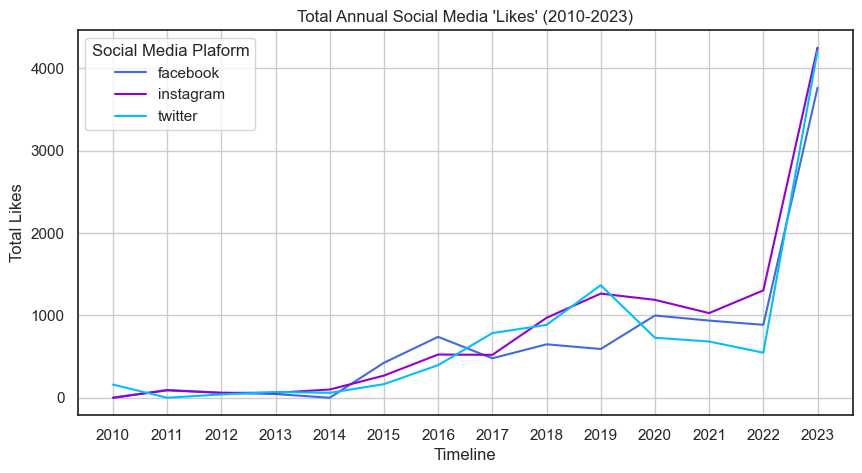

In [42]:
# Creating a pivot table to chart the annual total number of likes from 2010-2023 on all platforms to find long term trends in the data
sm.pivot_table(index='year',
               columns='platform',
               values='likes',
               aggfunc='sum').plot(color=['royalblue', 'darkviolet', 'deepskyblue'],
                                   figsize=[10,5])

plt.title('Total Annual Social Media \'Likes\' (2010-2023)')
plt.xlabel('Timeline')
plt.xticks(np.arange(2010, 2024, step=1))
plt.ylabel('Total Likes')

plt.legend(title='Social Media Plaform')
plt.grid()
plt.show()

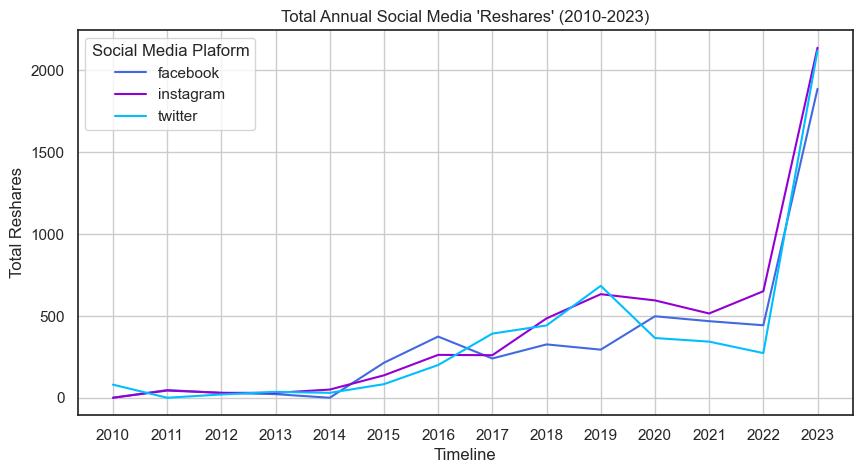

In [43]:
# Creating a pivot table to chart the annual total number of reshares from 2010-2023 on all platforms to find long term trends in the data
sm.pivot_table(index='year',
               columns='platform',
               values='reshared',
               aggfunc='sum').plot(color=['royalblue', 'darkviolet', 'deepskyblue'],
                                   figsize=[10,5])

plt.title('Total Annual Social Media \'Reshares\' (2010-2023)')
plt.xlabel('Timeline')
plt.xticks(np.arange(2010, 2024, step=1))
plt.ylabel('Total Reshares')

plt.legend(title='Social Media Plaform')
plt.grid()
plt.show()

# Based on the total number of annual likes and reshares, vividly shows that the number of likes and reshares 
# are heavily correlated across all platforms. Overall, engagement is roughly at a similar level from 2010 to 2023 
# with each social media platform taking the lead in total engagement for about a year before minorly being overtaken for a year. 

[Back to Table of Contents](#back)

### User Sentiment

#### Is user post sentiment different on each platform?


In [44]:
# Creating a custom function to calculate the total number of posts with each unique sentiment type
def platform_sentiment(sentiment):
    sum_sentiment_posts = sm[(sm['sentiment'] == sentiment)].groupby(['platform', 'sentiment']).agg({'user': 'count'}).apply(list).reset_index()
    sum_sentiment_posts.name = 'sum_sentiment_posts'
    return sum_sentiment_posts

# Calculating for each sentiment type 
pos = platform_sentiment('positive')
neutral = platform_sentiment('neutral')
neg = platform_sentiment('negative')

#Creating a new dataframe with the new data
sentiment_count = pd.concat([pos, neutral, neg], ignore_index = True)
sentiment_count = sentiment_count[sentiment_count['user'] > 0].sort_values(by=['platform', 'user'])
sentiment_count

,platform,sentiment,user
10,facebook,neutral,24
18,facebook,negative,59
2,facebook,positive,148
13,instagram,neutral,28
21,instagram,negative,67
5,instagram,positive,163
16,twitter,neutral,20
24,twitter,negative,68
8,twitter,positive,155


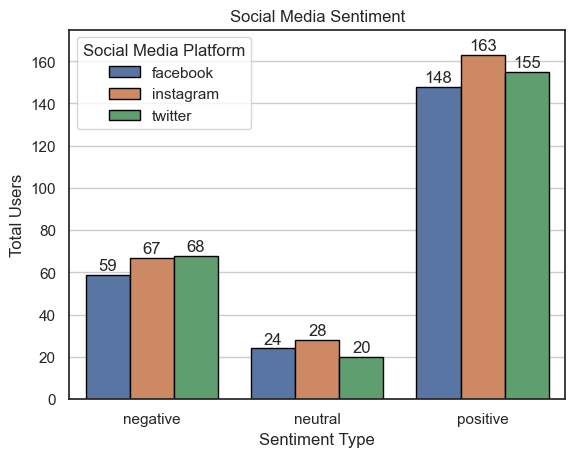

In [45]:
# Plotting the total number of posts with each unique sentiment from all platforms
sentiment_bar = sns.barplot(data=sentiment_count,
                            x='sentiment',
                            y='user',
                            hue='platform',
                            edgecolor='black')

for rect in sentiment_bar.patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    space = 1
    label = '{:.0f}'.format(y_value)
    sentiment_bar.annotate(label, (x_value, y_value), xytext=(0, space), textcoords='offset points', ha='center', va='bottom')

plt.title('Social Media Sentiment')
plt.xlabel('Sentiment Type')
plt.ylabel('Total Users')
plt.ylim([0, 175])

plt.legend(title='Social Media Platform')
plt.grid(axis='y')

plt.show()

# From this chart, it appears that Twitter tends to have the most negative posts and Instagram 
# tends to have the most positive posts. However, generally, most posts on social media are positive posts and by a large margin.

[Back to Table of Contents](#back)

#### Does user sentiment affect the length of their text posts?

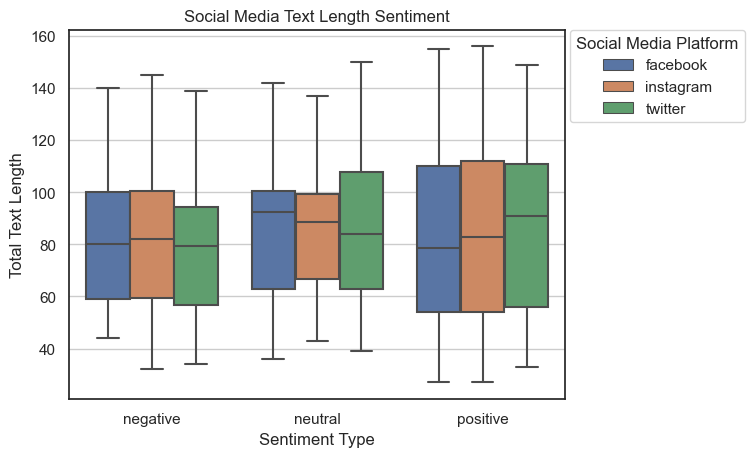

In [46]:
# Creating a box plot to measure the length of texts in posts with different sentiments across all platforms
sns.boxplot(data=sm,
            x='sentiment',
            y='text_len',
            hue='platform')

plt.title('Social Media Text Length Sentiment')
plt.xlabel('Sentiment Type')
plt.ylabel('Total Text Length')

plt.legend(title='Social Media Platform',
           loc=[1.01, 0.75])
plt.grid(axis='y')
plt.show()

# This boxplot shows that negative posts on Twitter seem to be on average shorter than on other platforms and positive posts across all platforms can greatly vary in text length

[Back to Table of Contents](#back)

#### Does user sentiment affect likes and shareability?

In [47]:
# To find the effects post sentiment has on likes and shareability, we first need to group the posts 
# by sentiment type and then we can find the average number of likes and reshares per post to compare
sentiment_avgs = sm.groupby('sentiment').agg({'user': 'count',
                                              'likes': 'sum',
                                              'reshared': 'sum'})

# Calculating the average likes and reshares per post for each sentiment type
sentiment_avgs['avg_likes'] = (sentiment_avgs['likes'] / sentiment_avgs['user']).round(1)
sentiment_avgs['avg_reshares'] = (sentiment_avgs['reshared'] / sentiment_avgs['user']).round(1)

# Removing the columns we no longer need and adding the sentiment column to categorize the average
# likes and reshares
sentiment_avgs.drop(columns=['user', 'likes', 'reshared'], inplace=True)
sentiment_avgs.insert(0, 'sentiment', ['negative', 'neutral', 'positive'], True)
sentiment_avgs

,sentiment,avg_likes,avg_reshares
sentiment,,,
negative,negative,35.7,17.9
neutral,neutral,44.6,22.4
positive,positive,45.7,22.9


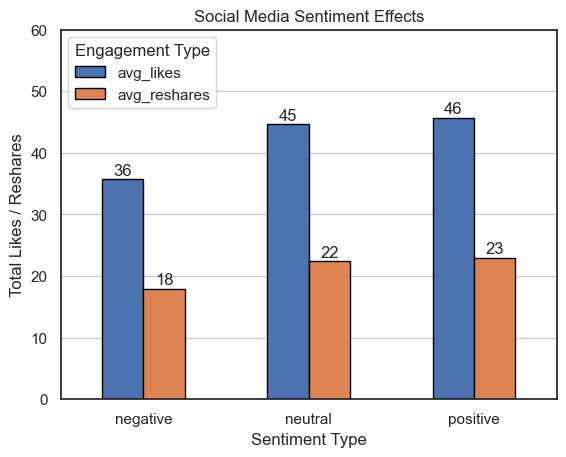

In [48]:
# Plotting the sentiment averages
sentiment_affects = sentiment_avgs.plot(kind='bar',
                                        edgecolor='black')

for rect in sentiment_affects.patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    space = 1
    label = '{:.0f}'.format(y_value)
    sentiment_affects.annotate(label, (x_value, y_value), xytext=(0, space), textcoords='offset points', ha='center', va='bottom')

plt.title('Social Media Sentiment Effects')
plt.xlabel('Sentiment Type')
plt.xticks(rotation=360)
plt.ylabel('Total Likes / Reshares')
plt.ylim([0, 60])

plt.legend(title='Engagement Type',
           loc='upper left')
plt.grid(axis='y')
plt.show()

# We have discovered a strong correlation between posts with negative sentiment and total likes when comparing the different 
# sentiment groups. Not surprisingly, posts that are perceived to be negative receive about 20% fewer likes than posts with a neutral or positive sentiment.  

[Back to Table of Contents](#back)

#### Are there any anomalies in user sentiment throughout the day?

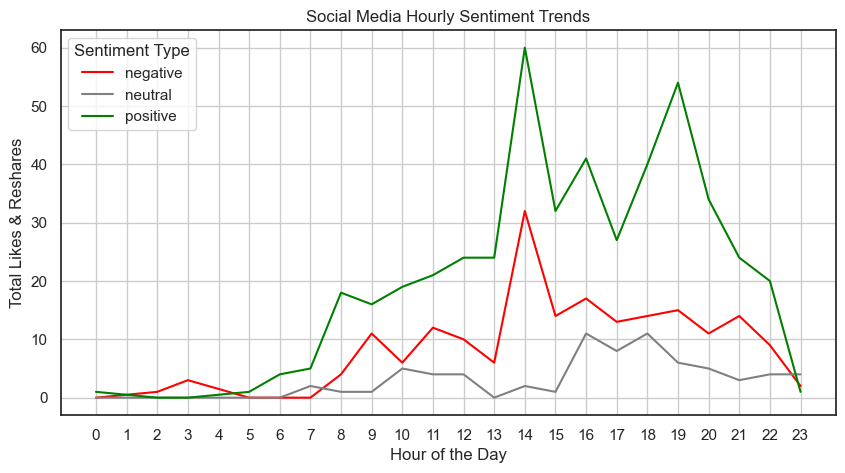

In [49]:
# Creating a pivot table to calculate the total hourly number of  posts for each sentiment type
sm.pivot_table(index='hour',
               columns='sentiment',
               values='user',
               aggfunc='count').plot(color=['red', 'grey', 'green'],
                                     figsize=[10,5])

plt.title('Social Media Hourly Sentiment Trends')
plt.xlabel('Hour of the Day')
plt.xticks(np.arange(0, 24, step=1))
plt.ylabel('Total Likes & Reshares')

plt.legend(title='Sentiment Type',
           loc='upper left')
plt.grid()
plt.show()

# The most notable difference in hourly sentiment is that around 7 pm there is a significant difference in the number of positive posts in comparison to negative posts at 7pm

[Back to Table of Contents](#back)

#### How has user sentiment on each platform changed over time?

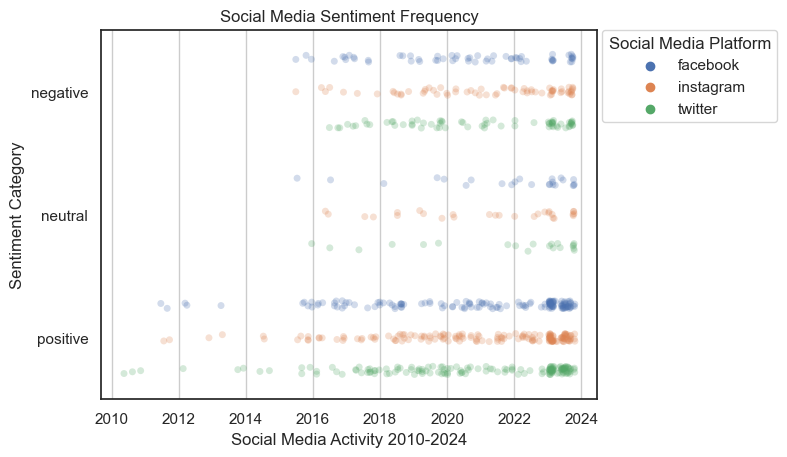

In [50]:
# Creating a stripplot to gauge post frequency from 2010 to 2023
sns.stripplot(data=sm,
              x='timestamp',
              hue='platform',
              y='sentiment',
              dodge=True,
              alpha=.25,
              zorder=1)

plt.title('Social Media Sentiment Frequency')
plt.xlabel('Social Media Activity 2010-2024')
plt.ylabel('Sentiment Category')

plt.legend(title='Social Media Platform',
           loc=[1.01, 0.75])
plt.grid(axis='x')
plt.show()

# Based on this chart, it shows a heavy lack of negative and neutral posts from 2010 to 2015, 
# possibly indicating a recording error during that period. However, aside from that issue, there
# seems to be a heavy increase in positive posts from about 2018 to 2022 before exponentially increasing by the end of 2023. 

[Back to Table of Contents](#back)

## Conclusion

General User Demographics:

- The documented users do not have a decisive favorite social media platform with all three platforms having roughly the same number of active users

-  The largest markets of active users are from the USA, UK, Canada, Australia, and India

- Most of the active users are from the western countries

User Activity:

-	In total, users tend to like posts more than resharing posts, for every two likes there will be one reshare

-	The likes-to-reshare ratio is the same across all social media platforms showcasing that this is a social media user behavior and not an anomaly

-	Looking at the timestamp from posts, user likes and reshares activity mirror each other with a two-to-one ratio but user activity differs from each platform:

    o	Facebook posts frequency starts slow throughout the morning until about 2 pm when the user activity spikes. After 2 pm activity slows down and maintains an elevated level until 7 pm when the daily activity peaks before significantly slowing down by midnight 

    o	Instagram post frequency is non-existent until 6 am and then users start to slowly increase their activity until 2 pm when we see a large spike recording the daily high in user activity. Instagram user activity slows from its 2 pm peak but remains at a highly elevated level until about 8 pm.

    o	Twitter post frequency does not start picking up until about 8 am and consistently increases to 2 pm where they see their first spike in activity. Unlike other social media platforms, Twitter user activity remains high until 8 pm and reaches their daily peak activity at 7 pm. 

-	Looking at the total posts per month for each platform, each platform shows a different number of user activities that differs from season to season.

    o	Facebook shows signs of peak activity in February and August in addition to high activity in January, June, and September.

    o	Instagram shows relatively high activity year-round with March, May, October, and December being the exceptions.

    o	Twitter’s high-activity months include January, February, June, August, and September.
    
-	When comparing total social media activity from 2010 to 2023 all three platforms show the same level of user activity. Generally, social media activity started to see significant growth from 2014 to 2019 before seeing exponential growth in 2023

User Sentiment

-	When grouping social media post sentiments across all platforms, surprisingly it shows that most posts are posts with positive sentiment by a significant margin

-	When looking at post sentiment and text length, there shows that there is a small correlation between negative posts on Twitter being on average shorter than negative posts on other platforms. It also shows that generally positive posts have a wider range of text length than the other sentiments.

-	We have also noticed a significant correlation between post likes, shareability, and post sentiment. Negative posts on average see about 20% fewer likes and reshares than neutral and positive posts. 

-	Throughout the day post frequency of each sentiment moves at a similar pace until 5 pm to 8 pm where positive posts see a spike in frequency while neutral and negative post frequency plateaus for the day

-	From 2010 to 2016 negative and neutral posts were non-existent indicating that there may be missing data within the dataset. However, in 2023 there is a significant increase in positive post frequency when compared to neutral and negative posts.


[Back to Table of Contents](#back)

## Dataset Citation

Kashish Parmar. (2024, January). Social Media Sentiments Analysis Dataset, Version 3. Retrieved May 1, 2024 from [Kaggle](https://www.kaggle.com/datasets/kashishparmar02/social-media-sentiments-analysis-dataset).

[Back to Table of Contents](#back)